# Importing Datasets

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive
!mkdir polynomial_data

/content/drive/MyDrive
mkdir: cannot create directory ‘polynomial_data’: File exists


In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
%cd polynomial_data/

/content/drive/MyDrive/polynomial_data


In [ ]:
%cp /content/Polynomial_train.csv /content/drive/MyDrive/polynomial_data
%cp /content/Polynomial_test.csv /content/drive/MyDrive/polynomial_data

cp: cannot stat '/content/Polynomial_train.csv': No such file or directory
cp: cannot stat '/content/Polynomial_test.csv': No such file or directory


In [ ]:
!ls

Polynomial_test.csv  Polynomial_train.csv


In [ ]:
train_path = '/content/drive/MyDrive/polynomial_data/Polynomial_train.csv'
test_path = '/content/drive/MyDrive/polynomial_data/Polynomial_test.csv'

train = pd.read_csv (train_path)
test = pd.read_csv (test_path)

## Checking Imported data

In [ ]:
train.head(5)

,Unnamed: 0,X,Y,Z,label
0,0,0.643715,-9.866550,-5.836019,307.972927
1,1,-1.366446,-3.761945,-8.756162,136.398375
2,2,-4.090270,-1.836218,-1.846066,-310.724813
3,3,-8.730478,-1.923651,3.892972,1.755447
4,4,5.367169,0.358357,6.703989,-343.582590


In [ ]:
test.head(5)

,Unnamed: 0,X,Y,Z,label
0,0,9.322078,0.413096,5.984731,-657.669309
1,1,2.811964,6.142752,6.419237,-545.362524
2,2,-2.669784,7.775091,-6.931907,-75.044187
3,3,-6.992156,-9.205548,0.852580,-2403.124902
4,4,1.574294,-2.213266,6.029188,8.595325


In [ ]:
# removing the "unnamed: 0" column

train = train.drop("Unnamed: 0", axis = 1)
test = test.drop("Unnamed: 0", axis = 1)

In [ ]:
train.head(3)

,X,Y,Z,label
0,0.643715,-9.866550,-5.836019,307.972927
1,-1.366446,-3.761945,-8.756162,136.398375
2,-4.090270,-1.836218,-1.846066,-310.724813


In [ ]:
test.head(3)

,X,Y,Z,label
0,9.322078,0.413096,5.984731,-657.669309
1,2.811964,6.142752,6.419237,-545.362524
2,-2.669784,7.775091,-6.931907,-75.044187


#Training Data

In [ ]:
# converting train DataFrame to array

train = np.array(train) 

# separating X, Y, Z, label

X = train [:,0].reshape((train.shape[0],1))

Y = train [:,1].reshape((train.shape[0],1))

Z = train [:,2].reshape((train.shape[0],1))

label = train [:,-1].reshape((train.shape[0],1))

In [ ]:
# checking the shape of X

X.shape 

(50000, 1)

In [ ]:
# checking the shape of Y

Y.shape 

(50000, 1)

In [ ]:
# checking the shape of Z

Z.shape 

(50000, 1)

In [ ]:
# checking the shape of label

label.shape 

(50000, 1)

## creating new Train dataset

In [ ]:
# getting degree one matrix

O = np.ones([X.shape[0],1]) # Ones Matrix

deg_one = np.concatenate((O,X,Y,Z), axis = 1) # degree one polynomial

pd.DataFrame(deg_one).head(3)

,0,1,2,3
0,1.0,0.643715,-9.866550,-5.836019
1,1.0,-1.366446,-3.761945,-8.756162
2,1.0,-4.090270,-1.836218,-1.846066


In [ ]:
# degree two polynomial

# multiplying elementwise

A = X * X

B = Y * Y

C = Z * Z

D = X * Y

E = Y * Z

F = Z * X

deg_two = np.concatenate( ( O , X , Y , Z , A , B , C , D , E , F ) , axis =1 )

pd.DataFrame(deg_two).head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.643715,-9.866550,-5.836019,0.414369,97.348811,34.059122,-6.351248,57.581378,-3.756734
1,1.0,-1.366446,-3.761945,-8.756162,1.867174,14.152233,76.670372,5.140495,32.940203,11.964821
2,1.0,-4.090270,-1.836218,-1.846066,16.730306,3.371695,3.407958,7.510625,3.389778,7.550906


In [ ]:
# degree three polynomial

# multiplying elementwise


A = X * X * X

B = Y * Y * Y

C = Z * Z * Z

D = X * Y * Z

E = X * X * Y

F = X * X * Z

G = Y * Y * Z

H = Y * Y * X

I = Z * Z * X

J = Z * Z * Y

K = X * X

L = Y * Y

M = Z * Z

N = X * Y

O = Y * Z

P = Z * X


deg_three = np.concatenate( ( O , X , Y, Z,  A , B , C , D , E , F , G , H , I , J, K, L, M, N, O, P ) , axis =1 )

pd.DataFrame(deg_three).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,57.581378,0.643715,-9.866550,-5.836019,0.266736,-960.496923,-198.769700,37.066006,-4.088395,-2.418267,-568.129550,62.664906,21.924374,-336.046039,0.414369,97.348811,34.059122,-6.351248,57.581378,-3.756734
1,32.940203,-1.366446,-3.761945,-8.756162,-2.551393,-53.239929,-671.338191,-45.011004,-7.024208,-16.349280,-123.919246,-19.338260,-104.765911,-288.429753,1.867174,14.152233,76.670372,5.140495,32.940203,11.964821
2,3.389778,-4.090270,-1.836218,-1.846066,-68.431463,-6.191165,-6.291315,-13.865106,-30.720481,-30.885243,-6.224370,-13.791141,-13.939468,-6.257753,16.730306,3.371695,3.407958,7.510625,3.389778,7.550906


## Training new Test data

In [ ]:
# converting test DataFrame to array

test = np.array(test) 

# separating X_test, Y_test, Z_test, label_test

X_test = test [:,0].reshape((test.shape[0],1))

Y_test = test [:,1].reshape((test.shape[0],1))

Z_test = test [:,2].reshape((test.shape[0],1))

label_test = test [:,-1].reshape((test.shape[0],1))


In [ ]:
# getting degree one matrix

O = np.ones([X_test.shape[0],1]) # Ones Matrix

deg_one_test = np.concatenate((O, X_test ,Y_test ,Z_test), axis = 1) # degree one polynomial

pd.DataFrame(deg_one_test).head(3)

,0,1,2,3
0,1.0,9.322078,0.413096,5.984731
1,1.0,2.811964,6.142752,6.419237
2,1.0,-2.669784,7.775091,-6.931907


In [ ]:
# normalizing degree one test data

# mean normalization

for a in range( 1, deg_one_test.shape[1] ):

  mean = np.mean( deg_one_test[:,a])

  deviate = ( np.amax( deg_one_test[:,a] ) - np.amin( deg_one_test[:,a]))

  for b in range(deg_one_test.shape[0]):

   deg_one_test[b,a] = ( deg_one_test[b,a] - mean ) / deviate

for c in range (label_test.size):

  label_test[c,0] =  ( label_test[c,0] - np.mean( label_test ) ) / ( np.amax( label_test ) - np.amin( label_test ))

In [ ]:
# degree two polynomial

# multiplying elementwise

A = X_test * X_test

B = Y_test * Y_test

C = Z_test * Z_test

D = X_test * Y_test

E = Y_test * Z_test

F = Z_test * X_test

deg_two_test = np.concatenate( ( O , X_test ,Y_test ,Z_test, A , B , C , D , E , F ) , axis =1 )

pd.DataFrame(deg_two_test).head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.0,9.322078,0.413096,5.984731,86.901134,0.170649,35.817002,3.850917,2.472271,55.790125
1,1.0,2.811964,6.142752,6.419237,7.907140,37.733401,41.206603,17.273196,39.431780,18.050662
2,1.0,-2.669784,7.775091,-6.931907,7.127749,60.452038,48.051334,-20.757816,-53.896207,18.506697


In [ ]:
# mean normalization of degree two

for d in range( 1, deg_two_test.shape[1] ):

  mean = np.mean( deg_two_test[:,d])

  deviate = ( np.amax( deg_two_test[:,d] ) - np.amin( deg_two_test[:,d]))

  for e in range(deg_two_test.shape[0]):

   deg_two_test[e,d] = ( deg_two_test[e,d] - mean ) / deviate


for f in range (label_test.size):

  label_test[f,0] =  ( label_test[f,0] - np.mean( label_test ) ) / ( np.amax( label_test ) - np.amin( label_test ))

In [ ]:
# degree three polynomial

# multiplying elementwise

A = X_test * X_test * X_test

B = Y_test * Y_test * Y_test

C = Z_test * Z_test * Z_test

D = X_test * Y_test * Z_test

E = X_test * X_test * Y_test

F = X_test * X_test * Z_test

G = Y_test * Y_test * Z_test

H = Y_test * Y_test * X_test

I = Z_test * Z_test * X_test

J = Z_test * Z_test * Y_test

K = X_test * X_test

L = Y_test * Y_test

M = Z_test * Z_test

N = X_test * Y_test

O = Y_test * Z_test

P = Z_test * X_test


deg_three_test = np.concatenate( ( O , X_test ,Y_test ,Z_test, A , B , C , D , E , F , G , H , I , J, K, L, M, N, O, P ) , axis =1 )

pd.DataFrame(deg_three_test).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.472271,9.322078,0.413096,5.984731,810.099127,0.070494,214.355110,23.046703,35.898550,520.079884,1.021286,1.590800,333.888875,14.795876,86.901134,0.170649,35.817002,3.850917,2.472271,55.790125
1,39.431780,2.811964,6.142752,6.419237,22.234592,231.786917,264.514947,110.880736,48.571601,50.757807,242.219639,106.104956,115.871475,253.121937,7.907140,37.733401,41.206603,17.273196,39.431780,18.050662
2,-53.896207,-2.669784,7.775091,-6.931907,-19.029553,470.020091,-333.087377,143.891252,55.418895,-49.408891,-419.047904,-161.393909,-128.286702,373.603489,7.127749,60.452038,48.051334,-20.757816,-53.896207,18.506697


In [ ]:
# mean normalization of degree three

for g in range( 1, deg_three_test.shape[1] ):

  mean = np.mean( deg_three_test[:,g])

  deviate = ( np.amax( deg_three_test[:,g] ) - np.amin( deg_three_test[:,g]))

  for h in range(deg_three_test.shape[0]):

    deg_three_test[h,g] = ( deg_three_test[h,g] - mean ) / deviate


for i in range (label_test.size):

  label_test[i,0] =  ( label_test[i,0] - np.mean( label_test ) ) / ( np.amax( label_test ) - np.amin( label_test ))

## Function

### Degree One

In [ ]:
def one (deg_one, label, alpha, iteration):

  m = label.size # training set length

  theta = np.zeros( (deg_one.shape[1] , 1) ) # initializing theta

  cost_list = [] # to store cost Function

  # mean normalization

  for i in range( 1, deg_one.shape[1] ):

     mean = np.mean( deg_one[:,i])

     deviate = ( np.amax( deg_one[:,i] ) - np.amin( deg_one[:,i]))

     for j in range(deg_one.shape[0]):

       deg_one[j,i] = ( deg_one[j,i] - mean ) / deviate


  for k in range (label.size):

    label[k,0] =  ( label[k,0] - np.mean( label ) ) / ( np.amax( label ) - np.amin( label ))
  

  for z in range(iteration): 

   

      label_pred = np.dot(deg_one, theta) # hypothesis

      cost = (1/(2*m))* np.sum(np.square(label_pred - label)) # Cost Function

      d_cost = (1/m)* np.sum(np.dot(deg_one.T, (label_pred - label) )) # differentiating Cost Function w.r.t Theta

      temp = theta # storing theta in a temp variable

      temp = theta - alpha * d_cost # calculating new temp

      theta = temp # updating theta

      cost_list.append(cost) # updating cost Function list


      # to see if cost is decreasing

      if z % 2000 == 0:
        print("Cost is", cost)

      

  return theta , cost_list

In [ ]:
iteration = 10000

alpha = 0.001

theta1 , cost_list = one (deg_one, label, alpha = alpha, iteration = iteration)

Cost is 0.009762595159268863
Cost is 0.009762109484846201
Cost is 0.00976210494362856
Cost is 0.009762104901166661
Cost is 0.009762104900769628


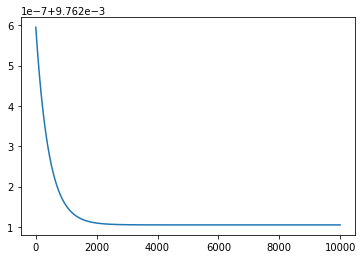

In [ ]:
iter = np.arange( 0, iteration)
plt.plot(iter, cost_list)
plt.show()

### Degree two

In [ ]:
def two (deg_two, label, alpha, iteration):

  m = label.size # training set length

  theta = np.zeros( (deg_two.shape[1] , 1) ) # initializing theta

  cost_list = [] # to store cost Function

  # mean normalization

  for i in range( 1, deg_two.shape[1] ):

     mean = np.mean( deg_two[:,i])

     deviate = ( np.amax( deg_two[:,i] ) - np.amin( deg_two[:,i]))

     for j in range(deg_two.shape[0]):

       deg_two[j,i] = ( deg_two[j,i] - mean ) / deviate


  for k in range (label.size):

    label[k,0] =  ( label[k,0] - np.mean( label ) ) / ( np.amax( label ) - np.amin( label ))
  

  for z in range(iteration): 

   

      label_pred = np.dot(deg_two, theta) # hypothesis

      cost = (1/(2*m))* np.sum(np.square(label_pred - label)) # Cost Function

      d_cost = (1/m)* np.sum(np.dot(deg_two.T, (label_pred - label) )) # differentiating Cost Function w.r.t Theta

      temp = theta # storing theta in a temp variable

      temp = theta - alpha * d_cost # calculating new temp

      theta = temp # updating theta

      cost_list.append(cost) # updating cost Function list


      # to see if cost is decreasing

      if z % 2000 == 0:
        print("Cost is", cost)

      

  return theta , cost_list

In [ ]:
iteration = 10000

alpha = 0.001

theta2 , cost_list = two (deg_two, label, alpha = alpha, iteration = iteration)

Cost is 0.0039046397845334223
Cost is 0.003880262036875561
Cost is 0.0038801515362720277
Cost is 0.0038801510353896835
Cost is 0.003880151033119261


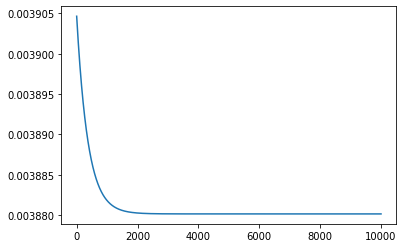

In [ ]:
iter = np.arange( 0, iteration)
plt.plot(iter, cost_list)
plt.show()

### Degree Three

In [ ]:
def three (deg_three, label, alpha, iteration):

  m = label.size # training set length

  theta = np.zeros( (deg_three.shape[1] , 1) ) # initializing theta

  cost_list = [] # to store cost Function

  # mean normalization

  for i in range( 1, deg_three.shape[1] ):

     mean = np.mean( deg_three[:,i])

     deviate = ( np.amax( deg_three[:,i] ) - np.amin( deg_three[:,i]))

     for j in range(deg_three.shape[0]):

       deg_three[j,i] = ( deg_three[j,i] - mean ) / deviate


  for k in range (label.size):

    label[k,0] =  ( label[k,0] - np.mean( label ) ) / ( np.amax( label ) - np.amin( label ))
  

  for z in range(iteration): 

   

      label_pred = np.dot(deg_three, theta) # hypothesis

      cost = (1/(2*m))* np.sum(np.square(label_pred - label)) # Cost Function

      d_cost = (1/m)* np.sum(np.dot(deg_three.T, (label_pred - label) )) # differentiating Cost Function w.r.t Theta

      temp = theta # storing theta in a temp variable

      temp = theta - alpha * d_cost # calculating new temp

      theta = temp # updating theta

      cost_list.append(cost) # updating cost Function list


      # to see if cost is decreasing

      if z % 2000 == 0:
        print("Cost is", cost)

      

  return theta , cost_list

In [ ]:
iteration = 10000

alpha = 0.001

theta3 , cost_list = three (deg_three, label, alpha = alpha, iteration = iteration)

Cost is 0.0032332572169889258
Cost is 0.003105822436911877
Cost is 0.003105822436911877
Cost is 0.003105822436911877
Cost is 0.003105822436911877


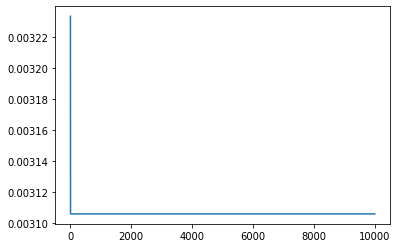

In [ ]:
iter = np.arange( 0, iteration)
plt.plot(iter, cost_list)
plt.show()

# Error

## Checking error for degree one

In [ ]:
label_test_pred = np.dot(deg_one_test, theta1)

m = label_test.size

error1 = (1/m)*np.sum(np.abs(label_test_pred - label_test))

rms_error1 = np.sqrt( np.mean( (label_test_pred - label_test) **2 ))

print(rms_error1)

print(error1)

0.08532044481539053
0.061482298264523685


## Checking error for degree two




In [ ]:
label_test_pred = np.dot(deg_two_test, theta2)

m = label_test.size

error2 = (1/m)*np.sum(np.abs(label_test_pred - label_test))

rms_error2 = np.sqrt( np.mean( (label_test_pred - label_test) **2 ))

print(rms_error2)

print(error2)

0.0846598280145995
0.060688234028739796


## Checking error for degree three



In [ ]:
label_test_pred = np.dot(deg_three_test, theta3)

m = label_test.size

error3 = (1/m)*np.sum(np.abs(label_test_pred - label_test))

rms_error3 = np.sqrt( np.mean( (label_test_pred - label_test) **2 ))

print(rms_error3)

print(error3)

0.08362956220538188
0.06093580952073737


# Results

In [ ]:
print("RMS error for degree 1:",rms_error1)
print("RMS error for degree 2:",rms_error2)
print("RMS error for degree 3:",rms_error3)

RMS error for degree 1: 0.08532044481539053
RMS error for degree 2: 0.0846598280145995
RMS error for degree 3: 0.08362956220538188


In [ ]:
if rms_error1 < rms_error2 and rms_error1 < rms_error3:
  print("Our algorithm works best for Degree 1")

elif rms_error2 < rms_error3 and rms_error2 < rms_error1:
  print("Our algorithm works best for Degree 2")

else:
  print("Our algorithm works best for Degree 3")

Our algorithm works best for Degree 3
